# PROJECT NAME : SQL_FACTBOOK

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

population - The population as of 2015.
population_growth - The annual population growth rate, as a percentage.
area - The total land and water area.

*DATA SOURCE:* [factbook](https://github.com/factbook/factbook.sql/releases)

In [1]:
import pandas as pd
import sqlite3



#using the cursor class object - required for SQL GUI based tool.
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
query = "SELECT * FROM sqlite_master WHERE type='table'"
cursor.execute(query).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [2]:
df = pd.read_sql_query(query, conn)
print(df)

    type             name         tbl_name  rootpage  \
0  table            facts            facts         2   
1  table  sqlite_sequence  sqlite_sequence         3   

                                                 sql  
0  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...  
1             CREATE TABLE sqlite_sequence(name,seq)  


In [3]:
#query that returns the first 5 rows of the facts table 

q2 = " SELECT * FROM facts LIMIT 5"
df = pd.read_sql_query(q2, conn)
print(df)


   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   
1               0.30       12.92        6.58            3.30   
2               1.84       23.67        4.31            0.92   
3               0.12        8.13        6.96            0.00   
4               2.78       38.78       11.49            0.46   

                   created_at                  updated_at  
0  2015-11-01 13:19:49.461734  2015-11-01 13:19:49.461734  
1  2015-11-01 13:19:54.431082  2015-11-01 13:19:54.431082  
2  2015-

In [4]:
q3 = "SELECT MIN(population) min_pop, MAX(population) max_pop , MIN(population_growth) min_popgrow, MAX(population_growth) max_popgrow FROM facts"
df = pd.read_sql_query(q3, conn)
print(df)

   min_pop     max_pop  min_popgrow  max_popgrow
0        0  7256490011          0.0         4.02


In [5]:
q4 = '''

SELECT *
FROM facts
WHERE population == (SELECT MIN(population) FROM facts)

'''

q5 = '''

SELECT *
FROM facts
WHERE population == (SELECT MAX(population) FROM facts)         

'''


df = pd.read_sql_query(q4, conn)
print(df)

df = pd.read_sql_query(q5, conn)
print(df)


    id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  \
0              None       None       None           None   

                   created_at                  updated_at  
0  2015-11-01 13:38:44.885746  2015-11-01 13:38:44.885746  
    id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate                  created_at  \
0        18.6         7.8           None  2015-11-01 13:39:09.910721   

                   updated_at  
0  2015-11-01 13:39:09.910721  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10A79DD0>,
      dtype=object)

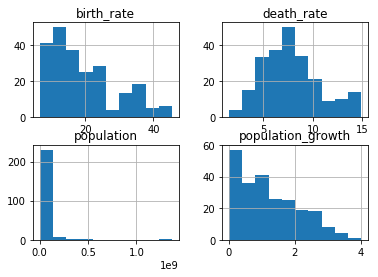

In [10]:
import matplotlib.pyplot as plt

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist()


In [7]:
q7 = '''
SELECT name, (CAST(population as FLOAT) / CAST(area as float)) density
FROM facts


'''

df = pd.read_sql_query(q7, conn)
print(df)

                                              name      density
0                                      Afghanistan    49.927697
1                                          Albania   105.373522
2                                          Algeria    16.602211
3                                          Andorra   182.863248
4                                           Angola    15.741841
5                              Antigua and Barbuda   209.131222
6                                        Argentina    15.620733
7                                          Armenia   102.759708
8                                        Australia     2.938944
9                                          Austria   103.319979
10                                      Azerbaijan   112.942032
11                                    Bahamas, The    23.385951
12                                         Bahrain  1771.859211
13                                      Bangladesh  1138.069143
14                                      

In [8]:
#Which countries have the highest ratios of water to land?
q8 = '''

SELECT name, MAX(CAST(area_water as FLOAT) / CAST(area_land as float)) maxwatertoland
FROM facts

'''

df = pd.read_sql_query(q8, conn)
print(df)

                             name  maxwatertoland
0  British Indian Ocean Territory      905.666667


In [9]:
#Which countries have more water than land?

q9 ='''

SELECT name
FROM facts
WHERE area_water > area_land
'''

df = pd.read_sql_query(q9, conn)
print(df)

                             name
0  British Indian Ocean Territory
1                  Virgin Islands
